# 2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.patches import Patch

In [17]:
def analyze_complex_function(
    R_function,
    x_range=(-3, 3),
    y_range=(-3, 3),
    resolution=1000,
    title=None,
    threshold=1,
    colors=["#4a86e8", "#f9cb9c"],
    figsize=(20, 10),
    alpha=0.5,
):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    RZ = R_function(Z)
    magnitude = np.abs(RZ)

    plt.style.use("default")
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    ax.set_facecolor("white")

    plt.suptitle(title, fontsize=16, y=0.98)

    mask = magnitude < threshold
    im = ax.contourf(
        X,
        Y,
        mask,
        levels=[
            0,
            0.5,
            1,
        ],  
        colors=[
            colors[1],
            colors[0],
        ],  
        alpha=alpha,
    )

    legend_elements = [
        Patch(facecolor=colors[0], alpha=alpha, label=f"|{title}| < {threshold}"),
        Patch(facecolor=colors[1], alpha=alpha, label=f"|{title}| ≥ {threshold}"),
    ]
    ax.legend(handles=legend_elements, loc="upper right")

    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    ax.grid(True, alpha=0.3, color="gray", linestyle="-", linewidth=0.5)
    ax.set_aspect("equal")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    return fig, ax


In [18]:
def R1(z):
    return z+1
def R2(z):
    return 1/(1-z)

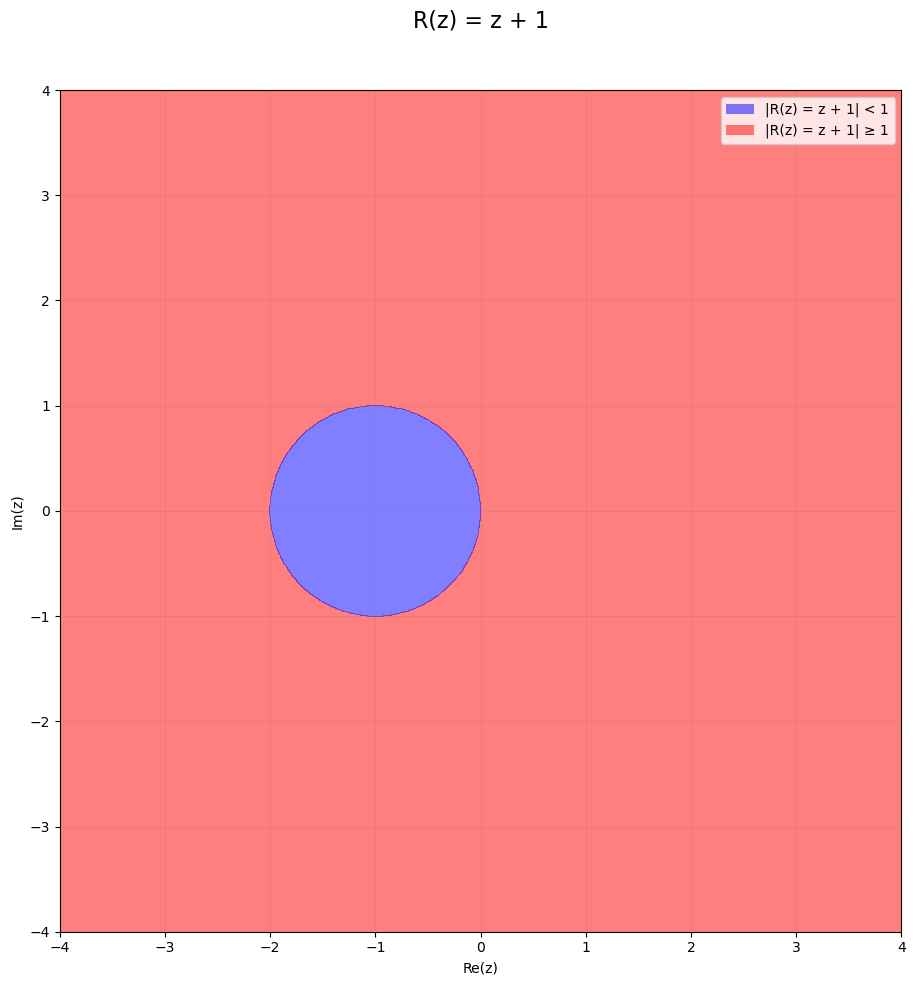

In [19]:
analyze_complex_function(R1, title="R(z) = z + 1", threshold=1, colors=["blue", "red"], x_range = (-4,4), y_range = (-4,4))
plt.show()

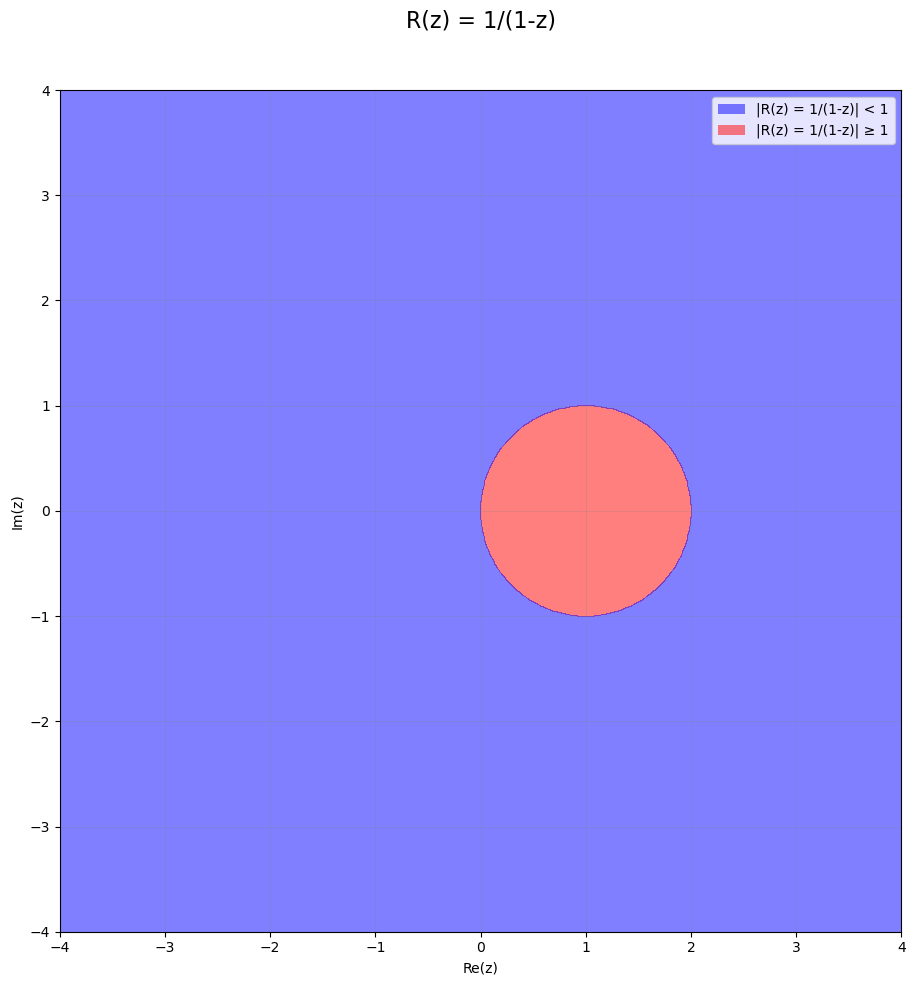

In [20]:
analyze_complex_function(R2, title="R(z) = 1/(1-z)", threshold=1, colors=["blue", "red"], x_range = (-4,4), y_range = (-4,4))
plt.show()

# 2.2

In [24]:
import numpy as np
import pandas as pd


def f(t, x, lam):
    return lam * (x - np.cos(t)) - np.sin(t)


def exact_solution(t):
    return np.cos(t)


T_0 = 0.0
T = 2.0 
X_0 = 1.0 

lambda_vals = [-2, -20, -200, -2000, -20000]
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]  


def custom_scientific_format(x):
    """Formats numbers in a custom scientific notation for tables."""
    if pd.isna(x) or x == 0:
        return "0.0"
    if not np.isfinite(x):
        return str(x)
    exponent = int(np.floor(np.log10(abs(x))))
    coefficient = x / (10**exponent)
    if abs(coefficient) < 1:
        coefficient *= 10
        exponent -= 1
    elif abs(coefficient) >= 10:
        coefficient /= 10
        exponent += 1

    return f"{coefficient:.3f}e{exponent:+d}"


all_results = {}

for lam in lambda_vals:
    results_for_lambda = []  

    for N in N_values:
        h = (T - T_0) / N
        t_nodes = np.linspace(T_0, T, N + 1)

        x_forward = np.zeros(N + 1)
        x_forward[0] = X_0
        for k in range(N):
            x_forward[k + 1] = x_forward[k] + h * f(t_nodes[k], x_forward[k], lam)

        x_backward = np.zeros(N + 1)
        x_backward[0] = X_0
        denominator = 1.0 - h * lam
        for k in range(N):
            numerator = (
                    x_backward[k]
                    - h * lam * np.cos(t_nodes[k + 1])
                    - h * np.sin(t_nodes[k + 1])
                )
            x_backward[k + 1] = numerator / denominator

        exact_vals = exact_solution(t_nodes)

        err_forward = (
            np.max(np.abs(x_forward - exact_vals))
            if np.all(np.isfinite(x_forward))
            else np.inf
        )
        err_backward = (
            np.max(np.abs(x_backward - exact_vals))
            if np.all(np.isfinite(x_backward))
            else np.inf
        )

        results_for_lambda.append(
            {
                "N": N,
                "h": h,
                "Err-Euler-Otwarty": err_forward,
                "Err-Euler-Zamkniety": err_backward,
            }
        )

    df = pd.DataFrame(results_for_lambda)
    df["h"] = df["h"]
    df["Err-Euler-Otwarty"] = df["Err-Euler-Otwarty"].map(custom_scientific_format)
    df["Err-Euler-Zamkniety"] = df["Err-Euler-Zamkniety"].map(custom_scientific_format)

    print(f"\nTabela dla lambda = {lam}")
    print(df.to_string(index=False))
    all_results[lam] = df 




Tabela dla lambda = -2
   N        h Err-Euler-Otwarty Err-Euler-Zamkniety
  10 0.200000          3.765e-2            3.141e-2
  20 0.100000          1.789e-2            1.635e-2
  40 0.050000          8.733e-3            8.354e-3
  80 0.025000          4.316e-3            4.223e-3
 160 0.012500          2.146e-3            2.123e-3
 320 0.006250          1.070e-3            1.064e-3
 640 0.003125          5.344e-4            5.329e-4
1280 0.001563          2.670e-4            2.666e-4

Tabela dla lambda = -20
   N        h Err-Euler-Otwarty Err-Euler-Zamkniety
  10 0.200000          2.960e+2            4.568e-3
  20 0.100000          4.996e-3            2.340e-3
  40 0.050000          1.250e-3            1.194e-3
  80 0.025000          6.143e-4            6.020e-4
 160 0.012500          3.055e-4            3.025e-4
 320 0.006250          1.524e-4            1.516e-4
 640 0.003125          7.608e-5            7.589e-5
1280 0.001563          3.802e-5            3.797e-5

Tabela dla lam

/var/folders/6q/0rvs1gp90tq_570xlt858npr0000gn/T/ipykernel_94145/3828513996.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return lam * (x - np.cos(t)) - np.sin(t)
/var/folders/6q/0rvs1gp90tq_570xlt858npr0000gn/T/ipykernel_94145/3828513996.py:51: RuntimeWarning: invalid value encountered in scalar add
  x_forward[k + 1] = x_forward[k] + h * f(t_nodes[k], x_forward[k], lam)
/var/folders/6q/0rvs1gp90tq_570xlt858npr0000gn/T/ipykernel_94145/3828513996.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return lam * (x - np.cos(t)) - np.sin(t)
/var/folders/6q/0rvs1gp90tq_570xlt858npr0000gn/T/ipykernel_94145/3828513996.py:51: RuntimeWarning: invalid value encountered in scalar add
  x_forward[k + 1] = x_forward[k] + h * f(t_nodes[k], x_forward[k], lam)
